In [1]:
# importing essential librarries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading the dataset
customers = pd.read_csv('ecommerce_customer_data.csv')

In [5]:
# viewing the loaded dataset
customers

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2
...,...,...,...,...,...,...,...,...,...
495,496,Male,24,Mumbai,Tablet,40,45,0,0
496,497,Female,24,Hyderabad,Desktop,8,34,4,5
497,498,Male,19,Pune,Desktop,33,41,0,3
498,499,Male,28,Chennai,Desktop,6,32,7,4


In [6]:
# dataset shape
customers.shape

(500, 9)

In [7]:
# customers columns
customers.columns

Index(['User_ID', 'Gender', 'Age', 'Location', 'Device_Type',
       'Product_Browsing_Time', 'Total_Pages_Viewed', 'Items_Added_to_Cart',
       'Total_Purchases'],
      dtype='object')

In [9]:
# overview of measurement columns
print(customers.describe)

<bound method NDFrame.describe of      User_ID  Gender  Age   Location Device_Type  Product_Browsing_Time  \
0          1  Female   23  Ahmedabad      Mobile                     60   
1          2    Male   25    Kolkata      Tablet                     30   
2          3    Male   32  Bangalore     Desktop                     37   
3          4    Male   35      Delhi      Mobile                      7   
4          5    Male   27  Bangalore      Tablet                     35   
..       ...     ...  ...        ...         ...                    ...   
495      496    Male   24     Mumbai      Tablet                     40   
496      497  Female   24  Hyderabad     Desktop                      8   
497      498    Male   19       Pune     Desktop                     33   
498      499    Male   28    Chennai     Desktop                      6   
499      500  Female   31    Kolkata      Mobile                     16   

     Total_Pages_Viewed  Items_Added_to_Cart  Total_Purchases  
0

# 1. Data Cleaning & Preparation

In [ ]:
# Handle missing values
customers.isna().sum() # our data has no missing values

User_ID                  0
Gender                   0
Age                      0
Location                 0
Device_Type              0
Product_Browsing_Time    0
Total_Pages_Viewed       0
Items_Added_to_Cart      0
Total_Purchases          0
dtype: int64

In [ ]:
# convert data types to required ones
customers.dtypes # the data types are correct we can proceed with our analysis

User_ID                   int64
Gender                   object
Age                       int64
Location                 object
Device_Type              object
Product_Browsing_Time     int64
Total_Pages_Viewed        int64
Items_Added_to_Cart       int64
Total_Purchases           int64
dtype: object

In [ ]:
# checking for duplicates
customers.duplicated().sum() # our data lacks duplicates, we can continue

np.int64(0)

In [17]:
# creating backup dataset incase we drop important columns or rows
customers.backup = customers.copy()

C:\Users\ratib\AppData\Local\Temp\ipykernel_21768\3883106702.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  customers.backup = customers.copy()


# 2. Customer Demographic Analysis 

In [18]:
# vital columns to anlyse customer data
customers.columns

Index(['User_ID', 'Gender', 'Age', 'Location', 'Device_Type',
       'Product_Browsing_Time', 'Total_Pages_Viewed', 'Items_Added_to_Cart',
       'Total_Purchases'],
      dtype='object')

In [19]:
# location, age, gender for customer demographics
def age_to_generation(age):
    if age < 25:
        return 'Gen Z'
    elif 25 <= age < 40:
        return 'Millennial'
    elif 40 <= age < 55:
        return 'Gen X'
    else:
        return 'Baby Boomer'
customers['Generation'] = customers['Age'].apply(age_to_generation)

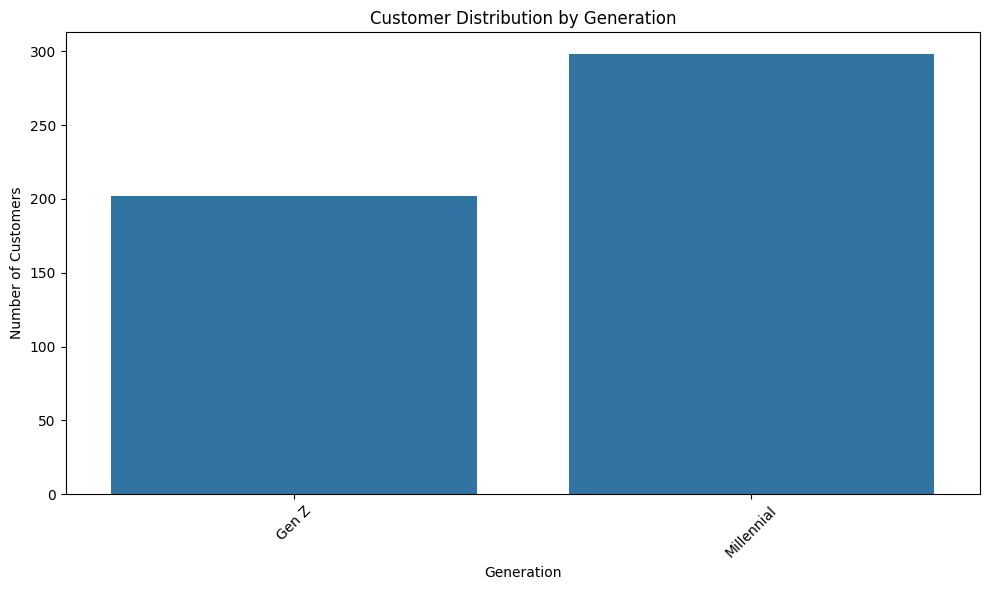

In [23]:
# generation distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Generation', )
plt.title('Customer Distribution by Generation')
plt.xlabel('Generation')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

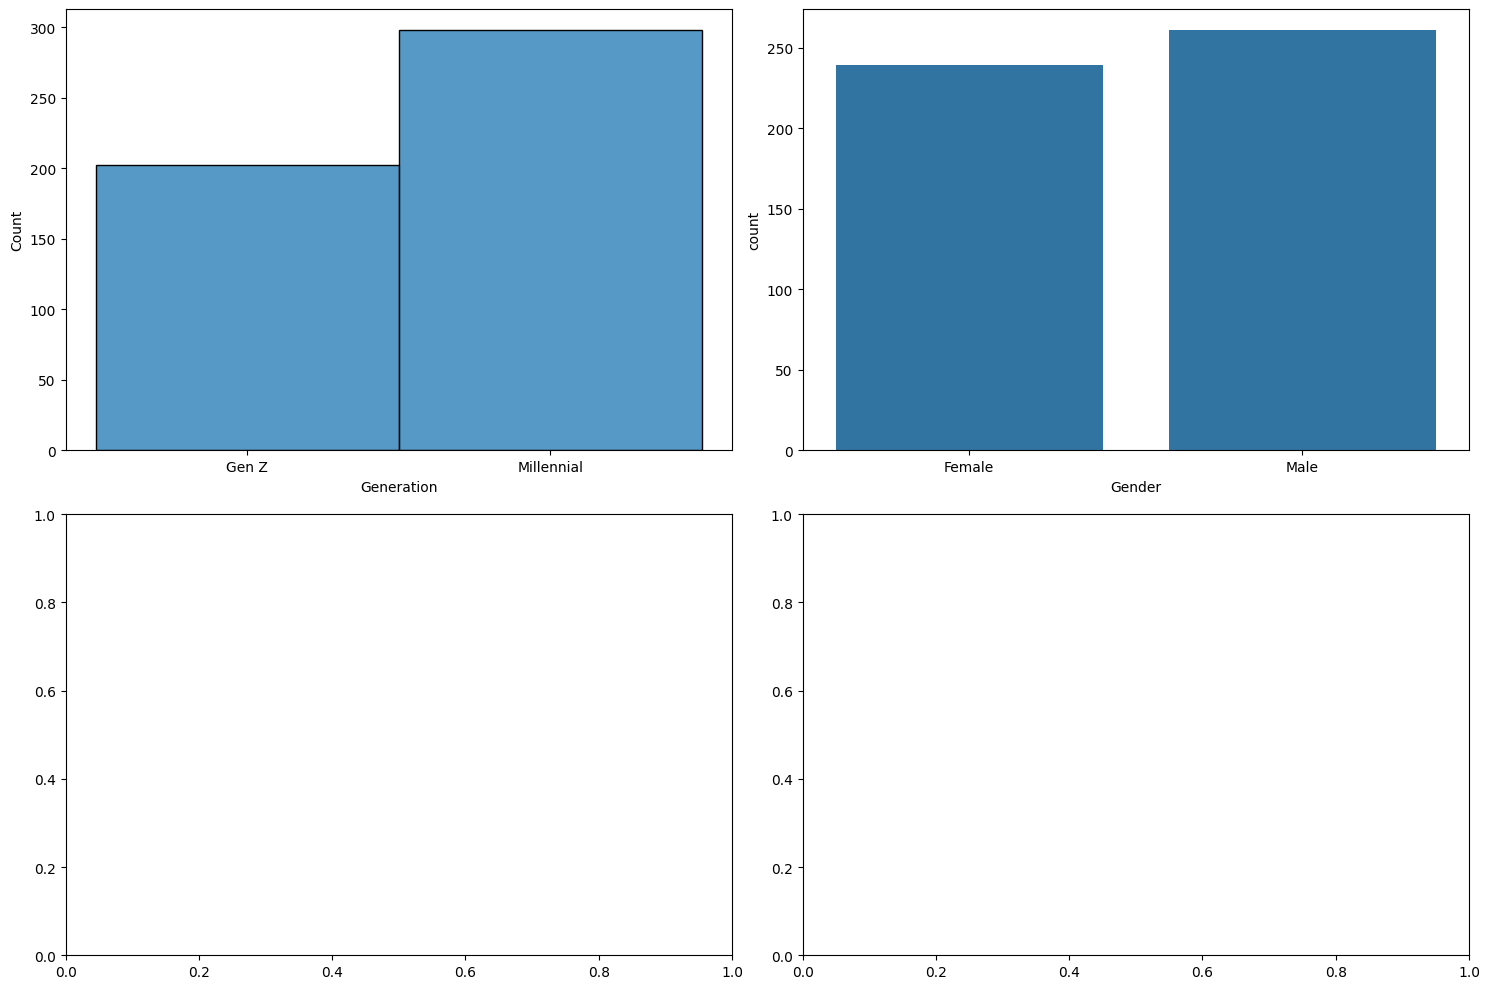

In [41]:
# distribution analysis 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data=customers, x='Generation', ax=axes[0, 0])
sns.countplot(data=customers, x='Gender', ax=axes[0, 1])
plt.tight_layout()
plt.show()

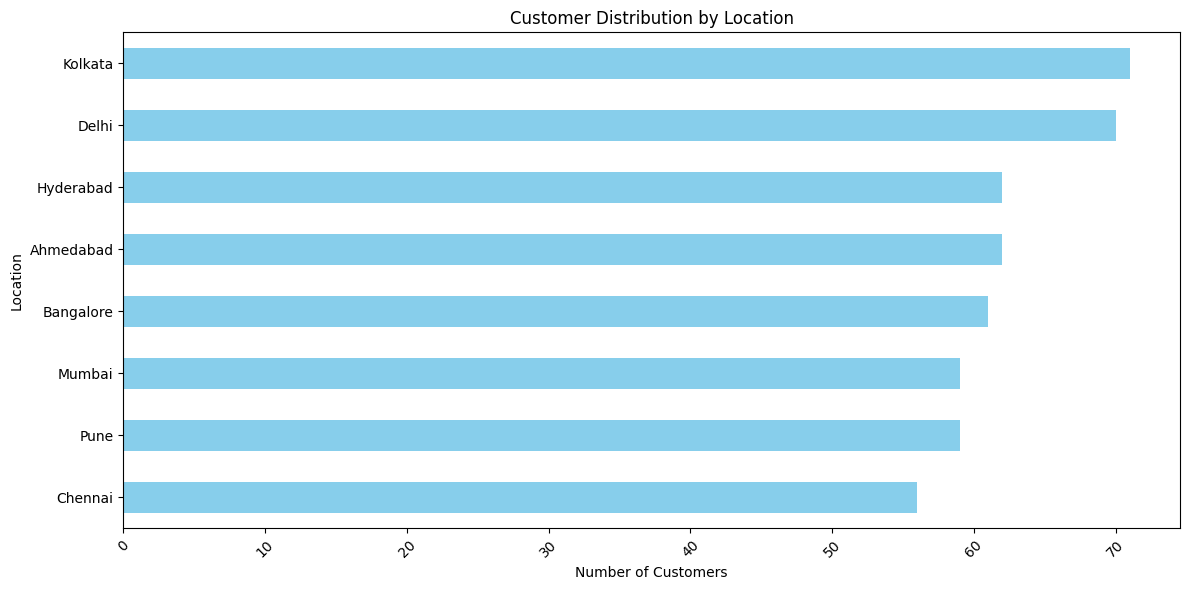

In [40]:
# location
location_counts = customers['Location'].value_counts()
plt.figure(figsize=(12, 6))
location_counts.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Customer Distribution by Location')
plt.xlabel('Number of Customers')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Analysis By Generation

In [43]:
# count by generation
gen_dist = customers['Generation'].value_counts(normalize=True) * 100
print("Customer Distribution by Generation (in %):")
print(gen_dist)

Customer Distribution by Generation (in %):
Generation
Millennial    59.6
Gen Z         40.4
Name: proportion, dtype: float64


In [44]:
customers.dtypes

User_ID                   int64
Gender                   object
Age                       int64
Location                 object
Device_Type              object
Product_Browsing_Time     int64
Total_Pages_Viewed        int64
Items_Added_to_Cart       int64
Total_Purchases           int64
Generation               object
dtype: object

In [47]:
# behaviour by generation
gen_behaviour = customers.groupby('Generation').agg({
    'Age': ['mean', 'max', 'min'],
    'Total_Pages_Viewed': 'mean',
    'Total_Purchases': 'mean',
    'Product_Browsing_Time': 'mean'
}).round(2)
print("\nCustomer Behaviour by Generation:")
gen_behaviour


Customer Behaviour by Generation:


Age         Total_Pages_Viewed Total_Purchases  \
             mean max min               mean            mean   
Generation                                                     
Gen Z       21.03  24  18              26.96            2.57   
Millennial  29.83  35  25              27.34            2.39   

           Product_Browsing_Time  
                            mean  
Generation                        
Gen Z                      31.41  
Millennial                 30.29

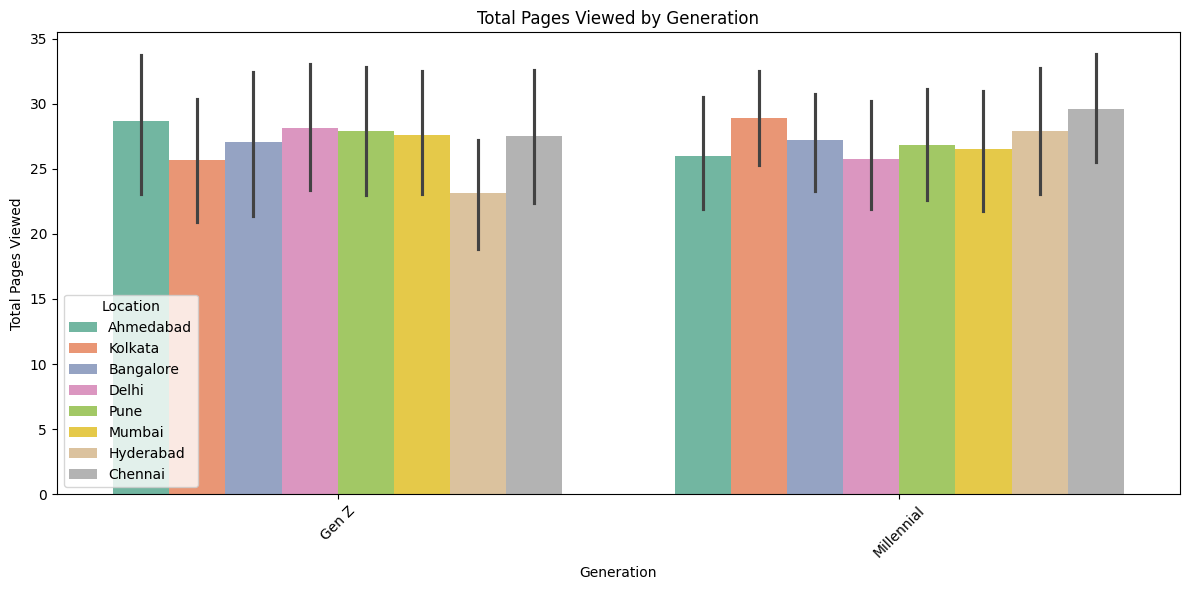

In [50]:
# visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=customers, x='Generation', y='Total_Pages_Viewed', palette='Set2', hue = 'Location')
plt.title('Total Pages Viewed by Generation')
plt.xlabel('Generation')
plt.ylabel('Total Pages Viewed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Behaviour Purchase Relationship (Enhanced)

<Figure size 1200x800 with 0 Axes>

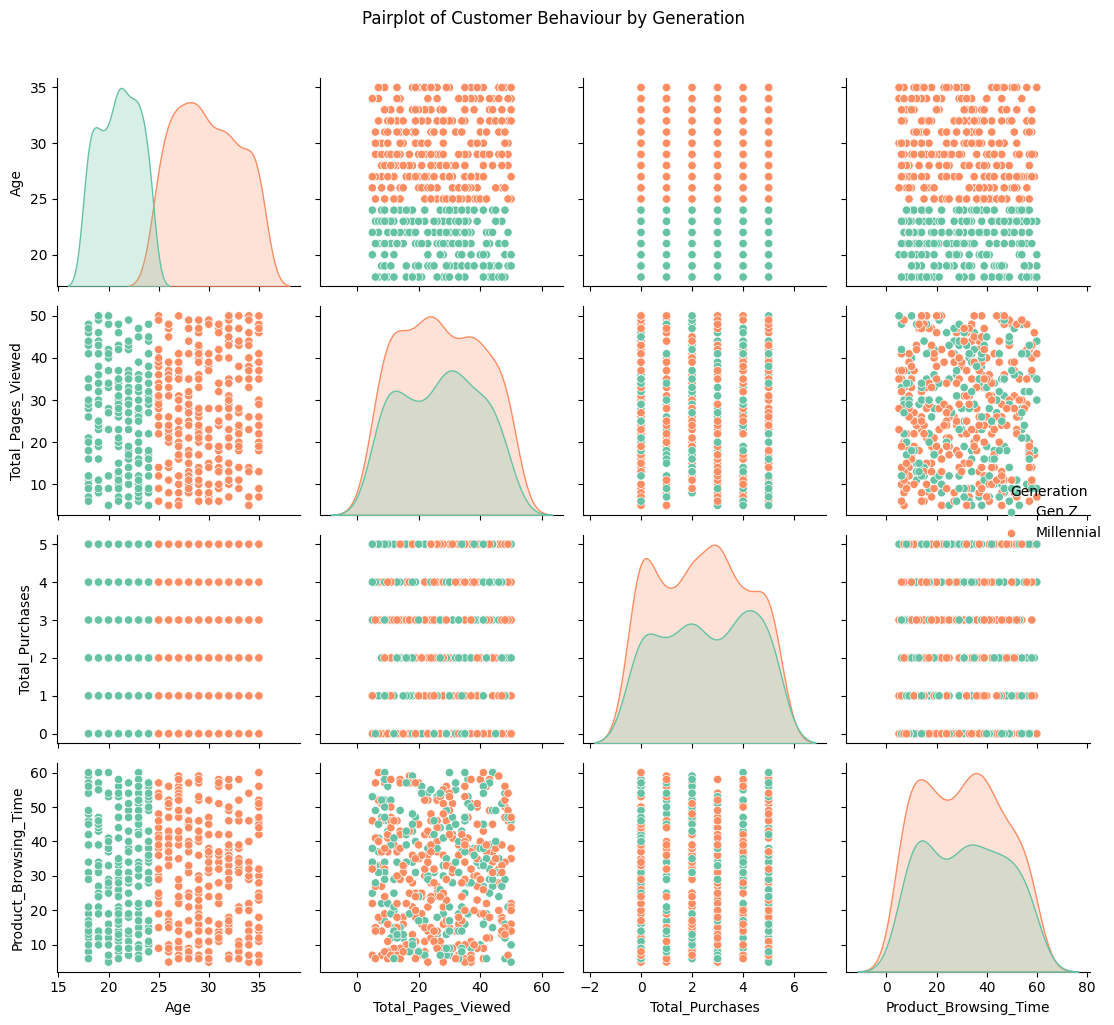

In [52]:
# Advanced correlation with demographic factors
plt.figure(figsize=(12, 8))
sns.pairplot(data=customers,  vars=['Age', 'Total_Pages_Viewed', 'Total_Purchases', 'Product_Browsing_Time'], hue='Generation', palette='Set2',diag_kind='kde')
plt.subplots_adjust(top=0.9)
plt.suptitle('Pairplot of Customer Behaviour by Generation', y=1.02)
plt.tight_layout()
plt.show()

In [53]:
# Statistical testing
from scipy.stats import pearsonr
corr, p = pearsonr(customers['Total_Pages_Viewed'], customers['Total_Purchases'])
print(f"\nPearson correlation between Total Pages Viewed and Total Purchases: {corr:.2f}, p-value: {p:.4f}")


Pearson correlation between Total Pages Viewed and Total Purchases: 0.01, p-value: 0.7611


# 5. Advanced Customer Segmentation

In [56]:
from sklearn.mixture import GaussianMixture

# prepare data for demographic 
x = customers[['Age', 'Total_Pages_Viewed', 'Total_Purchases', 'Product_Browsing_Time', 'Items']]
x = pd.get_dummies( x, columns=['Generation', 'Items_Added_to_Cart'], drop_first=True)

# Gausian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
customers['Cluster'] = gmm.fit_predict(x)

# segmenting profiles
segment_profiles = customers.groupby('Cluster').agg({
    'Age': ['mean' ],
    'Total_Pages_Viewed': ['mean' ],
    'Total_Purchases': ['mean'],
    'Product_Browsing_Time': ['mean'],
    'Items_Added_to_Cart': ['mean'],
    'Device_Type':lambda x: x.mean() * 100
}).round(2)
print("\nSegment Profiles:")


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.

Segment Profiles:
           Age Total_Pages_Viewed Total_Purchases Product_Browsing_Time  \
          mean               mean            mean                  mean   
Cluster                                                                   
0        25.99              40.12            2.32                 38.49   
1        26.20              16.63            2.34                 40.36   
2        26.64              24.78            2.74                 12.78   

        Items_Added_to_Cart  
                       mean  
Cluster                      
0                      5.45  
1                      4.78  
2                      5.23  


# 6. Revenue Impact Analysis

In [57]:
# revenue by location
revenue_by_location = customers.groupby('Location')['Total_Purchases'].sum().sort_values(ascending=False)
 

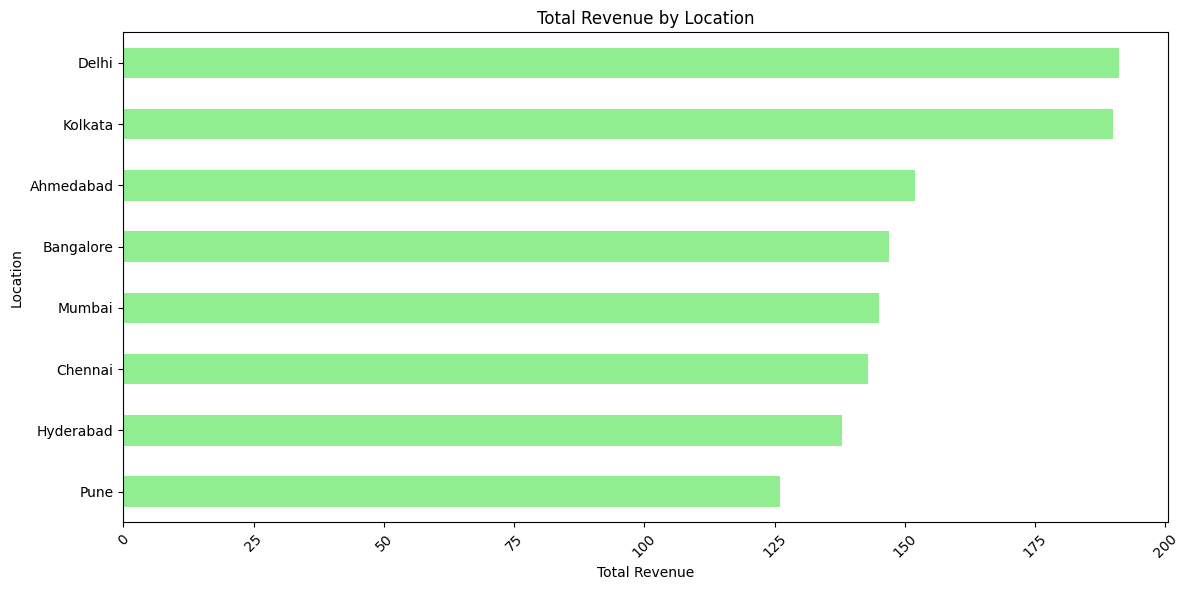

In [61]:
# visualization of revenue by location
plt.figure(figsize=(12, 6))
revenue_by_location.sort_values(ascending=True).plot(kind='barh', color='lightgreen')
plt.title('Total Revenue by Location')
plt.xlabel('Total Revenue')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
# customer lifetime value prediction
from sklearn.linear_model import LinearRegression

# Prepare data for regression
X = customers[['Age', 'Total_Pages_Viewed', 'Total_Purchases', 'Product_Browsing_Time']]
y = customers['Total_Purchases']
# Fit the model
model = LinearRegression()
model.fit(X, y)
# Predict customer lifetime value
customers['Predicted_CLV'] = model.predict(X)
# Display the predicted customer lifetime value
print("\nPredicted Customer Lifetime Value:")
print(customers[['User_ID', 'Predicted_CLV']].head())



Predicted Customer Lifetime Value:
   User_ID  Predicted_CLV
0        1   6.089985e-15
1        2   4.000000e+00
2        3  -1.038448e-14
3        4   3.000000e+00
4        5   2.000000e+00


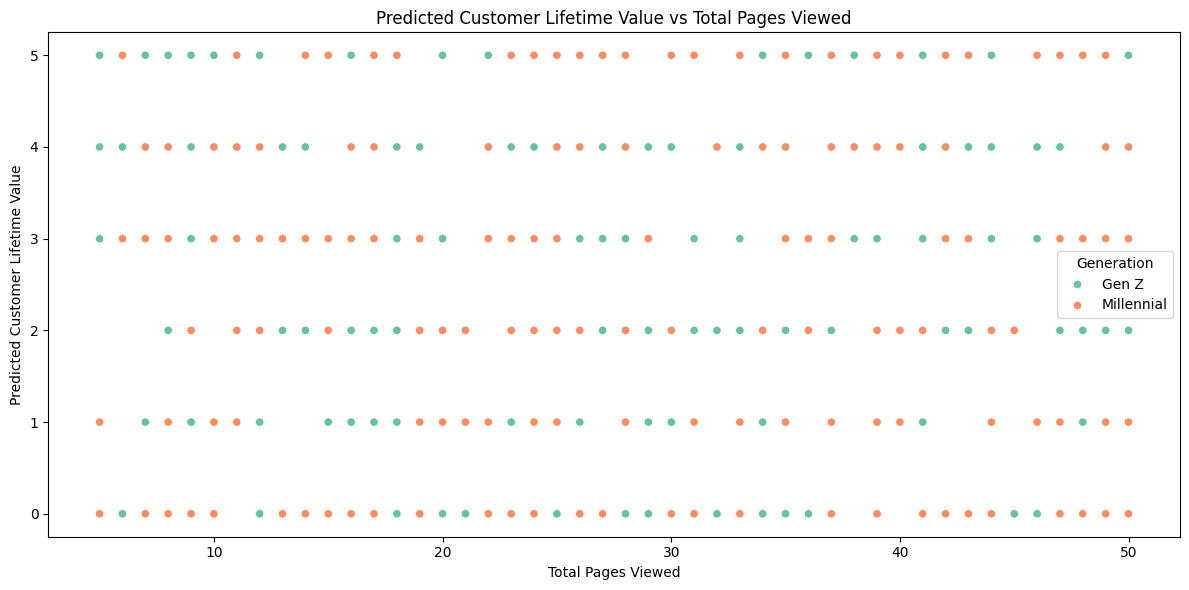

In [69]:
# visualization of lifetime value
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customers, x='Total_Pages_Viewed', y='Predicted_CLV', hue='Generation', palette='Set2')
plt.title('Predicted Customer Lifetime Value vs Total Pages Viewed')
plt.xlabel('Total Pages Viewed')
plt.ylabel('Predicted Customer Lifetime Value')
plt.legend(title='Generation')
plt.tight_layout()
plt.show()